# Boston Airbnb

**Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative.The analysis provided here maily aid the answer of the below questions.**
**1. When can you highly invest in Boston Airbnb?**
**2. where can you highly invest in Boston Airbnb?**
**3. How to gain best customer experience?**
**4. What is highly affect the price?**


In [399]:
#Do all the imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


**The Boston Airbnb dataset 
Listings: including full descriptions and average review score 
Reviews:  including unique id for each reviewer and detailed comments 
Calendar: including listing id and the price and availability for that day**

In [400]:
#Import the Boston Airbnb csv files

df_calendar = pd.read_csv('calendar2019.csv')
df_listings = pd.read_csv('listings2019.csv')
df_reviews = pd.read_csv('reviews2019.csv')

In [401]:
#list head of the data to visulaize them
print ("df_reviews")
df_reviews.head()


df_reviews


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3781,37776825,2015-07-10,36059247,Greg,The apartment was as advertised and Frank was ...
1,3781,41842494,2015-08-09,10459388,Tai,It was a pleasure to stay at Frank's place. Th...
2,3781,45282151,2015-09-01,12264652,Damien,The apartment description is entirely faithful...
3,3781,49022647,2015-09-30,41426327,Mike,Thoroughly enjoyed my time at Frank's home. Ha...
4,3781,52503327,2015-10-30,15151513,Ivan,Great value for the money! This location has e...


In [402]:
print ("df_calendar")
df_calendar.head()


df_calendar


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3781,2019-07-14,f,$125.00,$125.00,30,1125
1,3781,2019-07-15,f,$125.00,$125.00,30,1125
2,3781,2019-07-16,f,$125.00,$125.00,30,1125
3,3781,2019-07-17,f,$125.00,$125.00,30,1125
4,3781,2019-07-18,f,$125.00,$125.00,30,1125


In [403]:
print ("df_listings")
df_listings.head()

df_listings


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20190714024644,2019-07-14,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",...,f,f,super_strict_30,f,f,1,1,0,0,0.31
1,5506,https://www.airbnb.com/rooms/5506,20190714024644,2019-07-14,**$99 Special ** Private! Minutes to center!,This is a private guest room with private bath...,**THE BEST Value in BOSTON!!*** PRIVATE GUEST ...,This is a private guest room with private bath...,none,"Peacful, Architecturally interesting, historic...",...,t,f,strict_14_with_grace_period,f,f,6,6,0,0,0.76
2,6695,https://www.airbnb.com/rooms/6695,20190714024644,2019-07-14,$99 Special!! Home Away! Condo,NaN,** WELCOME *** FULL PRIVATE APARTMENT In a His...,** WELCOME *** FULL PRIVATE APARTMENT In a His...,none,"Peaceful, Architecturally interesting, histori...",...,t,f,strict_14_with_grace_period,f,f,6,6,0,0,0.84
3,6976,https://www.airbnb.com/rooms/6976,20190714024644,2019-07-14,Mexican Folk Art Showcase in Boston Neighborhood,Come stay with me in Boston's Roslindale neigh...,"This is a well-maintained, two-family house bu...",Come stay with me in Boston's Roslindale neigh...,none,The LOCATION: Roslindale is a safe and diverse...,...,f,f,moderate,t,f,1,0,1,0,0.66
4,8789,https://www.airbnb.com/rooms/8789,20190714024644,2019-07-14,Curved Glass Studio/1bd facing Park,"Bright, 1 bed with curved glass windows facing...",Fully Furnished studio with enclosed bedroom. ...,"Bright, 1 bed with curved glass windows facing...",none,Beacon Hill is a historic neighborhood filled ...,...,f,f,strict_14_with_grace_period,f,f,10,10,0,0,0.38


***eXPLORE THE DATA**

# Review Data Set

In [404]:
#How many review?
#Drop rows with Null in comment
df_reviews = df_reviews.dropna(subset=['comments'],axis=0)
print ('This analysis based on {} reviews ' .format(df_reviews.shape[0]))

This analysis based on 225751 reviews 


**1. When can you highly invest in Boston Airbnb?**

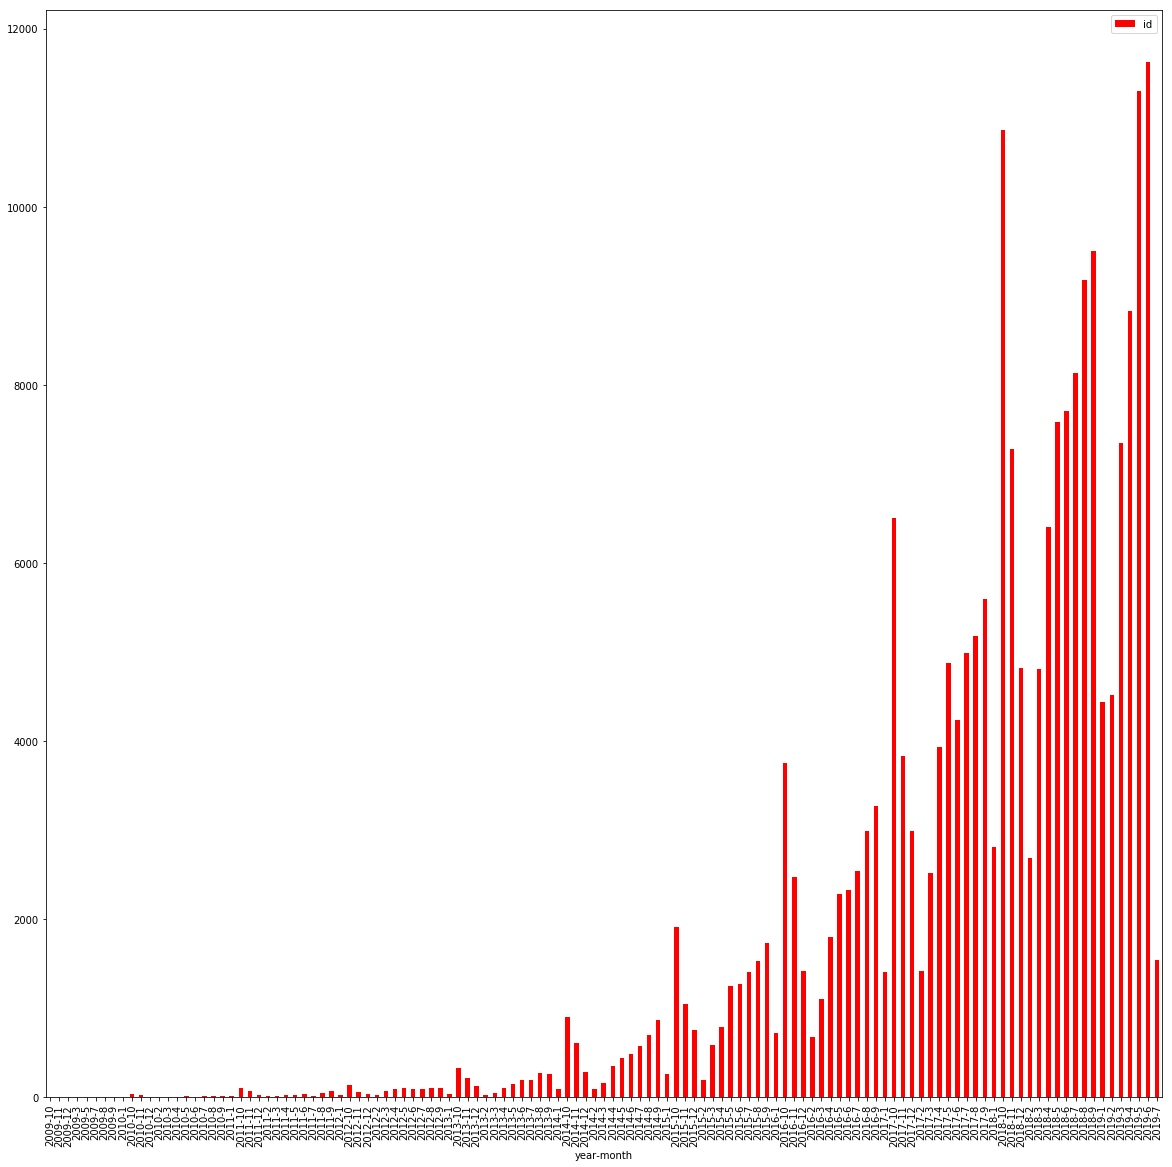

In [405]:
df_reviews['year-month'] = pd.DatetimeIndex(df_reviews['date']).year.map(str) + "-" + pd.DatetimeIndex(df_reviews['date']).month.map(str)

grouped = df_reviews.groupby('year-month')

grouped_comments = pd.DataFrame(grouped['id'].count()).reset_index()

grouped_comments.plot.bar(x='year-month',y='id',color='red',figsize=(20,20))



**Its obvious along the years October is the bussiest month along the year**

# Calender Data Set

**As the occupation along the month is fluctuating so what about the price is it related ?
Lets look at Calendar dataset**

In [406]:
print ("df_calendar")
df_calendar.head()


df_calendar


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3781,2019-07-14,f,$125.00,$125.00,30,1125
1,3781,2019-07-15,f,$125.00,$125.00,30,1125
2,3781,2019-07-16,f,$125.00,$125.00,30,1125
3,3781,2019-07-17,f,$125.00,$125.00,30,1125
4,3781,2019-07-18,f,$125.00,$125.00,30,1125


In [407]:
df_calendar = df_calendar[df_calendar['available']=='t']
House_Count=df_calendar['listing_id'].nunique()
print ('Number of available house is {}'.format(House_Count))


Number of available house is 4853


In [408]:
#check th null in the dataset
df_calendar.isnull().sum(axis=0)

listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64

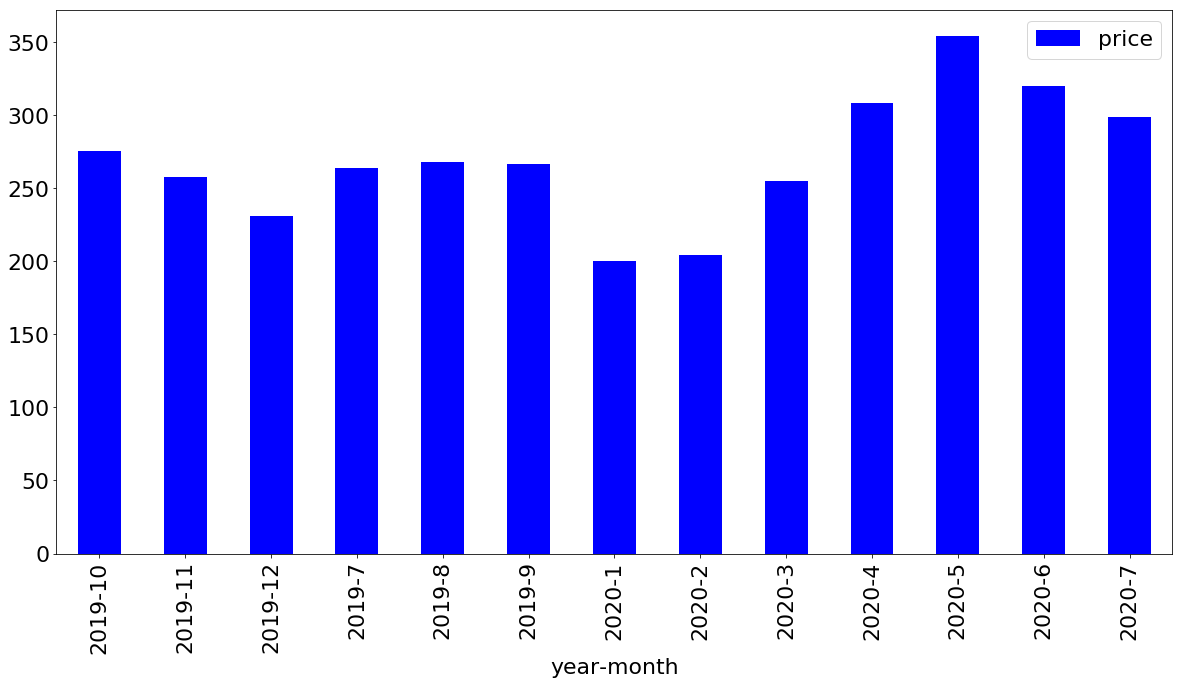

In [409]:
df_calendar['year-month'] = pd.DatetimeIndex(df_calendar['date']).year.map(str) + "-" + pd.DatetimeIndex(df_calendar['date']).month.map(str)

df_calendar['price']=df_calendar['price'].str.replace('$','')

df_calendar['price']=df_calendar['price'].str.replace(',','')

df_calendar['price'] = df_calendar['price'].astype(float)

grouped_Calendar = df_calendar.groupby('year-month')


grouped_Avg_Price = pd.DataFrame(grouped_Calendar['price'].mean()).reset_index()

plt.rcParams.update({'font.size': 22})
grouped_Avg_Price.plot.bar(x='year-month',y='price',color='blue',figsize=(20,10))

In [410]:
print("The Price listing covers the duration from {} to {}".format(df_calendar['date'].min(),
                                                                df_calendar['date'].max()))

The Price listing covers the duration from 2019-07-14 to 2020-07-12


**Listing Price covers 4,853 available house in the duration from 14 July 2017 to 12 July 2020 
From the above Price distribution we noticed that the price reach its max along the listed part of the year (July 2019-Dec 2019) in Oct and the minimum price was in Dec.
In the first half of the year (2020 covered) the highest price in May and the lowest in Jan and Feb
Hence if you look to the combined figure of the Price listing and the occupation distribution we can find that they are directly propotional**

# df_listing

Lets clean df_listing and choose selective feature to make it easier

In [411]:
pd.options.display.max_seq_items = 2000
df_listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20190714024644,2019-07-14,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",...,f,f,super_strict_30,f,f,1,1,0,0,0.31
1,5506,https://www.airbnb.com/rooms/5506,20190714024644,2019-07-14,**$99 Special ** Private! Minutes to center!,This is a private guest room with private bath...,**THE BEST Value in BOSTON!!*** PRIVATE GUEST ...,This is a private guest room with private bath...,none,"Peacful, Architecturally interesting, historic...",...,t,f,strict_14_with_grace_period,f,f,6,6,0,0,0.76


In [412]:
#Afer the data been scanned we need to focus on reviews/Apartement Type / Price 


#Split the features
layout_Features=['accommodates','bathrooms','bedrooms','beds']
review_Features=['review_scores_rating','number_of_reviews','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']
Object_Features=['neighbourhood_cleansed', 'property_type']
All_Selective_Features=['review_scores_rating','number_of_reviews','price','neighbourhood_cleansed', 'property_type', 'room_type','accommodates','bathrooms','bedrooms','beds','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']

df_listings = df_listings[All_Selective_Features]
df_listings.head()

,review_scores_rating,number_of_reviews,price,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,99.0,15,$125.00,East Boston,Apartment,Entire home/apt,2,1.0,1.0,1,10.0,10.0,10.0,10.0,10.0,10.0
1,95.0,95,$145.00,Roxbury,Guest suite,Entire home/apt,2,1.0,1.0,1,10.0,10.0,10.0,10.0,9.0,10.0
2,96.0,102,$169.00,Roxbury,Condominium,Entire home/apt,4,1.0,1.0,2,10.0,10.0,10.0,10.0,9.0,10.0
3,98.0,80,$65.00,Roslindale,Apartment,Private room,2,1.0,1.0,1,10.0,10.0,10.0,10.0,9.0,10.0
4,92.0,23,$99.00,Downtown,Apartment,Entire home/apt,2,1.0,1.0,1,9.0,9.0,10.0,10.0,10.0,9.0


**Where can you do your investemet?

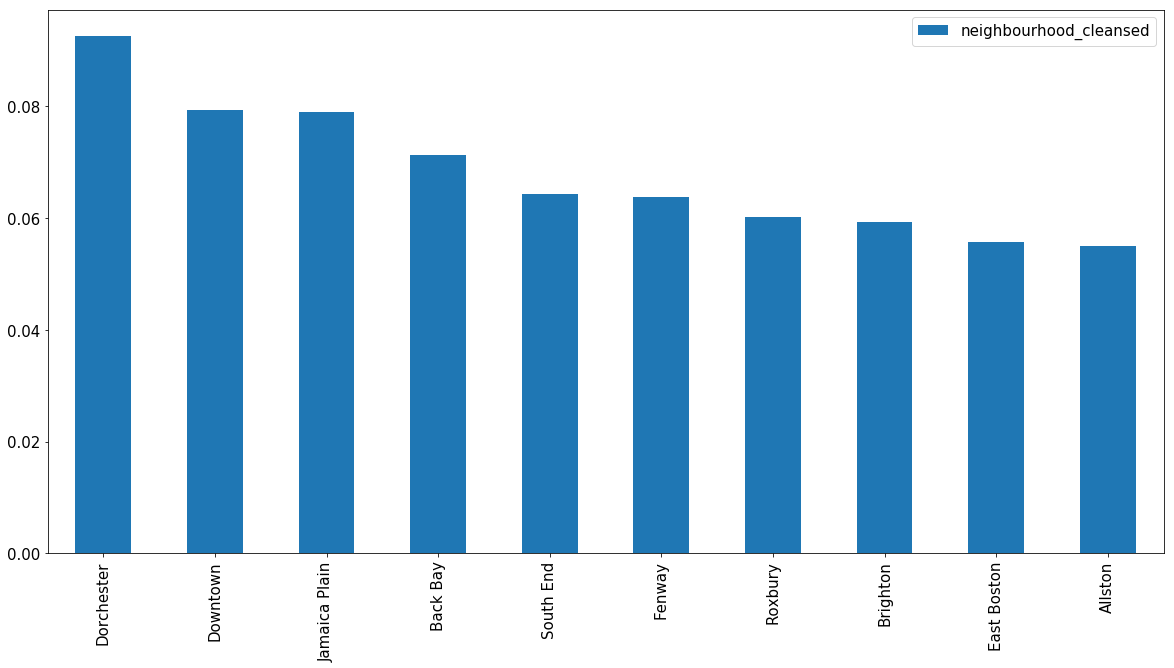

In [421]:
plt.rcParams.update({'font.size': 15})
pd.DataFrame(df_listings['neighbourhood_cleansed'].value_counts()[0:10]/df_listings.shape[0]).plot.bar(figsize=(20,10))

In [422]:
#Price reformatting
df_listings['price'] = df_listings['price'].str.replace('$','')
df_listings['price'] = df_listings['price'].str.replace(',','')
df_listings['price'] = df_listings['price'].astype(float)

# drop the rows if any review scores rating is null
df_listings = df_listings.dropna(subset=['price'],axis=0)



# the format price column
num_vars = df_listings.select_dtypes(include=['int', 'float']).columns
for col in num_vars:
    df_listings[col].fillna((df_listings[col].mean()), inplace=True)
    
#Dummy Variables for objects
cat_vars = df_listings.select_dtypes(include=['object']).columns
for var in cat_vars:
    df_listings = pd.concat([df_listings.drop([var], axis=1), pd.get_dummies(df_listings[var], drop_first=True)], axis=1)



In [423]:
df_listings.isnull().sum(axis=0)

review_scores_rating           0
number_of_reviews              0
price                          0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
Back Bay                       0
Bay Village                    0
Beacon Hill                    0
Brighton                       0
Charlestown                    0
Chinatown                      0
Dorchester                     0
Downtown                       0
East Boston                    0
Fenway                         0
Hyde Park                      0
Jamaica Plain                  0
Leather District               0
Longwood Medical Area          0
Mattapan                       0
Mission Hill                   0
North End                      0
          

In [424]:
MaxPrice=df_listings['price'].max()
Avgprice=df_listings['price'].mean()

print ('The price of the listed houses varies from {} given that the average price is {}'.format(MaxPrice,Avgprice))

The price of the listed houses varies from 10000.0 given that the average price is 199.06369731800766


Text(0.5, 0, 'price')

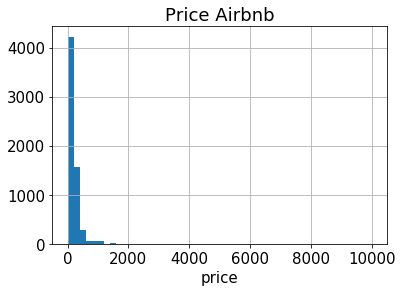

In [425]:
df_listings['price'].hist(bins=50)
plt.title('Price Airbnb')
plt.xlabel('price')


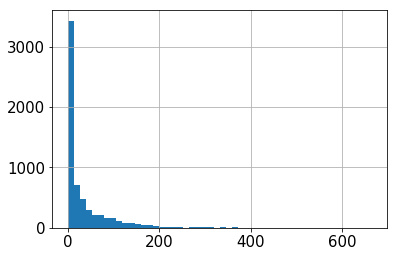

In [426]:
df_listings['number_of_reviews'].max()
df_listings['number_of_reviews'].hist(bins=50)

# Build The model

In [432]:

#Split into train and test
df_loc_property=df_listings.drop(review_Features,axis=1).drop(layout_Features,axis=1)
X=df_loc_property.drop('price',axis=1)

Y=df_listings['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .3, random_state=42) 

Boston_model = LinearRegression(normalize=True) # Instantiate
Boston_model.fit(X_train, Y_train) #Fit
        
#Predict and score the model
Boston_model_Y_preds = Boston_model.predict(X_test) 
"The r-squared score for your model was {} on {} values.".format(r2_score(Y_test, Boston_model_Y_preds), len(Y_test))

'The r-squared score for your model was 0.22035839310638017 on 1880 values.'

**What is the factor that highly impacted the price?**

In [433]:
#we need to know which features affect the price most
df_coef=pd.DataFrame()
df_coef['feature']=X_train.columns
df_coef['abs_coeff']=np.abs(Boston_model.coef_)
df_coef['coeff']=Boston_model.coef_
df_coef.sort_values('abs_coeff', ascending=False).head(30)



,feature,abs_coeff,coeff
28,Boutique hotel,2781.403241,2781.403241
12,Leather District,1192.152054,1192.152054
33,Farm stay,250.000000,250.000000
47,Shared room,195.509190,-195.509190
34,Guest suite,180.815516,-180.815516
32,Cottage,170.226933,-170.226933
40,Loft,164.522202,-164.522202
42,Resort,155.682434,-155.682434
46,Private room,150.682434,-150.682434
35,Guesthouse,144.321981,-144.321981


**It is clear from the above that the host property is highly affect the price**

**Our last question what about customer experience**

In [434]:
#Lets Check the most isuue impact customer experience
#Split into train and test
X_rev=df_listings[review_Features].drop(['review_scores_rating'],axis=1)
Y_rev=df_listings['review_scores_rating']

X_train, X_test, Y_train, Y_test = train_test_split(X_rev, Y_rev, test_size = .30, random_state=42) 

Boston_model_r = LinearRegression(normalize=True) # Instantiate
Boston_model_r.fit(X_train, Y_train) #Fit
        
#Predict and score the model
Boston_model_Y_preds = Boston_model_r.predict(X_test) 
"The r-squared score for your model was {} on {} values.".format(r2_score(Y_test, Boston_model_Y_preds), len(Y_test))

'The r-squared score for your model was 0.6866562157997989 on 1880 values.'

In [441]:
#we need to know which features affect the price most
df_coef_r=pd.DataFrame()
df_coef_r['feature']=X_train.columns
df_coef_r['abscoeff']=np.abs(Boston_model_r.coef_)
df_coef_r['coeff']=Boston_model_r.coef_
df_coef_r_sort=df_coef_r.sort_values('abscoeff', ascending=False)


In [447]:
df_coef_r_sort.head(7)

,feature,abscoeff,coeff
6,review_scores_value,3.012653,3.012653
1,review_scores_accuracy,2.829152,2.829152
2,review_scores_cleanliness,2.267741,2.267741
4,review_scores_communication,2.046139,2.046139
5,review_scores_location,0.173347,0.173347
3,review_scores_checkin,0.168746,0.168746
0,number_of_reviews,0.001983,-0.001983


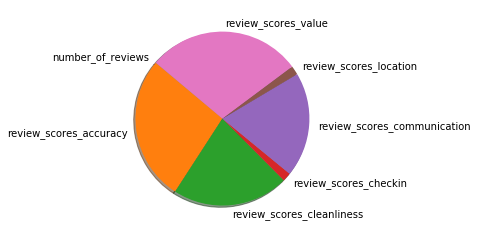

In [448]:
plt.rcParams.update({'font.size': 10})
x, y = plt.pie(df_coef_r['abscoeff'], labels=df_coef_r['feature'], shadow=True, startangle=140)



plt.show()

**from the above chart we can conclude that the Accuracy / Cleanliness and communication has great influence on the customers unlike the location /checkin and number of reviews**